# Pytheam - Project 1
----

### Summary
This notebook shows the process we followed to clean, explore and analyze the data sets that contains
information about the __"Recorridos realizados 2018"__ and the __"Usuarios ECOBICI 2018" of Buenos Aires, Argentina".

---

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [17]:
pwd

'/Users/dianapardo/Documents/GitHub/Proyectos/project1/Notebooks'

In [18]:
#First, get all information from de the dataset
Bas = ("../Resources/recorridos_realizados_2018.csv")
#File is zipped, due to the size of the file
Bas_reg = pd.read_csv(Bas)
Bas_reg.head()


,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27


In [19]:
#Adecuating format. Separate the column od date and day, this will allow me to make calculations for rush-hour usage

Bas_reg['Date'] = pd.to_datetime(Bas_reg['bici_Fecha_hora_retiro']).dt.date
Bas_reg['Time'] = pd.to_datetime(Bas_reg['bici_Fecha_hora_retiro']).dt.time
Bas_reg


,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Date,Time
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45,2018-01-01,00:08:05
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61,2018-01-01,00:18:05
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52,2018-01-01,00:20:14
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27,2018-01-01,00:20:22
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27,2018-01-01,00:20:31
5,476733,2018-01-01 00:21:01,0 days 00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31,2018-01-01,00:21:01
6,326932,2018-01-01 00:21:30,0 days 00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28,2018-01-01,00:21:30
7,347609,2018-01-01 00:22:48,0 days 00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27,2018-01-01,00:22:48
8,392077,2018-01-01 00:23:46,0 days 00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29,2018-01-01,00:23:46
9,457895,2018-01-01 00:24:19,0 days 00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26,2018-01-01,00:24:19


In [23]:
#Then, proceed to split information of "bici_tiempo_uso" in order to get average and total usage of each bike per user, bike and other references.
# new data frame with split value columns 
split_uso = Bas_reg['bici_tiempo_uso'].str.split(" ", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
Bas_reg['bici_dias_uso']= split_uso[0] 
  
# making seperate last name column from new data frame 
Bas_reg["bici_minutos_uso"]= split_uso[1] 
  
# df display 
Bas_reg 

#Bas_reg[['bici_tiempo_uso_dias','bici_tiempo_uso_minutos']] = Bas_reg['bici_tiempo_uso_dias'].str.split(" ", 1, expand=True)
#df['bici_tiempo_uso_minutos'] = df['bici_tiempo_uso_minutos'].str.strip(" ")

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Date,Time,bici_dias_uso,bici_minutos_uso
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45,2018-01-01,00:08:05,0,days 00:19:53.000000000
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61,2018-01-01,00:18:05,0,days 00:26:19.000000000
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52,2018-01-01,00:20:14,0,days 00:27:39.000000000
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27,2018-01-01,00:20:22,0,days 00:48:51.000000000
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27,2018-01-01,00:20:31,0,days 00:49:27.000000000
5,476733,2018-01-01 00:21:01,0 days 00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31,2018-01-01,00:21:01,0,days 00:36:10.000000000
6,326932,2018-01-01 00:21:30,0 days 00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28,2018-01-01,00:21:30,0,days 00:35:31.000000000
7,347609,2018-01-01 00:22:48,0 days 00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27,2018-01-01,00:22:48,0,days 00:31:07.000000000
8,392077,2018-01-01 00:23:46,0 days 00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29,2018-01-01,00:23:46,0,days 00:34:28.000000000
9,457895,2018-01-01 00:24:19,0 days 00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26,2018-01-01,00:24:19,0,days 00:17:08.000000000


In [24]:
# Dropping old Name columns 
#Bas_reg.drop(columns =["days"], inplace = True)

#Delete text "days" from bici_minutos_uso column
Bas_reg['bici_minutos_uso'] = Bas_reg['bici_minutos_uso'].map(lambda x: str(x)[4:])
Bas_reg

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,Date,Time,bici_dias_uso,bici_minutos_uso
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45,2018-01-01,00:08:05,0,00:19:53.000000000
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61,2018-01-01,00:18:05,0,00:26:19.000000000
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52,2018-01-01,00:20:14,0,00:27:39.000000000
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27,2018-01-01,00:20:22,0,00:48:51.000000000
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27,2018-01-01,00:20:31,0,00:49:27.000000000
5,476733,2018-01-01 00:21:01,0 days 00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31,2018-01-01,00:21:01,0,00:36:10.000000000
6,326932,2018-01-01 00:21:30,0 days 00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28,2018-01-01,00:21:30,0,00:35:31.000000000
7,347609,2018-01-01 00:22:48,0 days 00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27,2018-01-01,00:22:48,0,00:31:07.000000000
8,392077,2018-01-01 00:23:46,0 days 00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29,2018-01-01,00:23:46,0,00:34:28.000000000
9,457895,2018-01-01 00:24:19,0 days 00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26,2018-01-01,00:24:19,0,00:17:08.000000000


In [22]:
#Obtain the list of variables reported in the table
list(Bas_reg.columns.values)

['bici_id_usuario',
 'bici_Fecha_hora_retiro',
 'bici_tiempo_uso',
 'bici_nombre_estacion_origen',
 'bici_estacion_origen',
 'bici_nombre_estacion_destino',
 'bici_estacion_destino',
 'bici_sexo',
 'bici_edad',
 'Date',
 'Time',
 'bici_dias_uso',
 'bici_minutos_uso']

In [25]:
#Get the type of variable per each column
Bas_reg.dtypes

bici_id_usuario                  int64
bici_Fecha_hora_retiro          object
bici_tiempo_uso                 object
bici_nombre_estacion_origen     object
bici_estacion_origen             int64
bici_nombre_estacion_destino    object
bici_estacion_destino            int64
bici_sexo                       object
bici_edad                        int64
Date                            object
Time                            object
bici_dias_uso                   object
bici_minutos_uso                object
dtype: object

In [26]:
#New order of the table.
new_Bas_reg = Bas_reg[['bici_id_usuario', 'Date', 'Time','bici_dias_uso','bici_minutos_uso' ,'bici_nombre_estacion_origen','bici_estacion_origen','bici_nombre_estacion_destino','bici_estacion_destino','bici_sexo','bici_edad']]
new_Bas_reg


,bici_id_usuario,Date,Time,bici_dias_uso,bici_minutos_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01,00:08:05,0,00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01,00:18:05,0,00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01,00:20:14,0,00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01,00:20:22,0,00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01,00:20:31,0,00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27
5,476733,2018-01-01,00:21:01,0,00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31
6,326932,2018-01-01,00:21:30,0,00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28
7,347609,2018-01-01,00:22:48,0,00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27
8,392077,2018-01-01,00:23:46,0,00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29
9,457895,2018-01-01,00:24:19,0,00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26


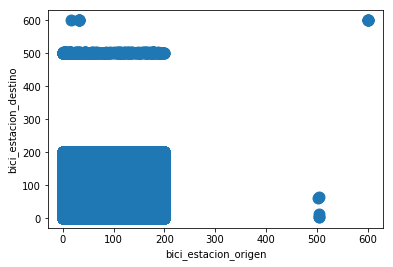

In [30]:
#Expliring most popular stations.
plot1=new_Bas_reg.plot(kind='scatter', x='bici_estacion_origen', y='bici_estacion_destino', s=120)
plot1.figure.savefig('../Output/Argentina_trend_deparrival.png')

In [32]:
#Table of trips. All year
Trips=new_Bas_reg['Date'].count()
Trips

2619968

In [33]:
#Number of users that used the bycicles
Bycicles_used=new_Bas_reg['bici_id_usuario'].nunique()
Bycicles_used

121015

In [34]:
#Number of departure stations
station_departure=new_Bas_reg['bici_estacion_origen'].nunique()
station_departure

201

In [35]:
#Number of arrival stations
station_arrival=new_Bas_reg['bici_estacion_destino'].nunique()
station_arrival

201

In [36]:
#Most common departure station
Common_dep=new_Bas_reg.groupby(['bici_nombre_estacion_origen'])['bici_id_usuario'].count()
df_Common_dep=pd.DataFrame(Common_dep)
df_Common_dep.head()

,bici_id_usuario
bici_nombre_estacion_origen,
15 de Noviembre,4377
25 de Mayo,9917
9 de Julio,7171
Acevedo,15889
Acuña de Figueroa,22002


In [37]:
df_Common_dep_reseted = df_Common_dep.reset_index()
df_Common_dep_reseted.head()

,bici_nombre_estacion_origen,bici_id_usuario
0,15 de Noviembre,4377
1,25 de Mayo,9917
2,9 de Julio,7171
3,Acevedo,15889
4,Acuña de Figueroa,22002


In [38]:
#Get the name of the most common station
df_Common_dep_reseted.loc[df_Common_dep_reseted['bici_id_usuario'].idxmax()]

bici_nombre_estacion_origen    Facultad de Medicina
bici_id_usuario                               38858
Name: 62, dtype: object

In [39]:
#Get gender statistics
Gender=new_Bas_reg.groupby(['bici_sexo'])['bici_id_usuario'].count()
Gender

bici_sexo
F     739160
M    1880740
N         68
Name: bici_id_usuario, dtype: int64

In [40]:
#Get percentaje of gender statistics
Percentagem=new_Bas_reg.groupby(['bici_sexo'])['bici_id_usuario'].count()/Trips*100
Percentagem
df_Percentagem=pd.DataFrame(Percentagem)
df_Percentagem

,bici_id_usuario
bici_sexo,
F,28.212558
M,71.784846
N,0.002595


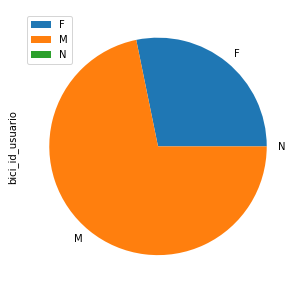

In [41]:
#Graph gender trends
Plot2=df_Percentagem.plot.pie(y='bici_id_usuario', figsize=(5, 5))
Plot2

In [43]:
#Save figure
Plot2.figure.savefig('../Output/Argentina_trend_gender.png')

In [203]:
#Average statistics per gender
Age=new_Bas_reg.groupby(['bici_sexo'])['bici_edad'].mean()
Age

bici_sexo
F    33.026154
M    33.308886
N    28.058824
Name: bici_edad, dtype: float64

In [44]:
#Minimum age per gender
Agemin=new_Bas_reg.groupby(['bici_sexo'])['bici_edad'].min()
Agemin

bici_sexo
F    16
M    16
N    22
Name: bici_edad, dtype: int64

In [45]:
#Maximum age per gender
Agemax=new_Bas_reg.groupby(['bici_sexo'])['bici_edad'].nlargest(2)
Agemax

bici_sexo         
F          1971666    135
           1972432    135
M          1646907    140
           1750550    140
N          108155      38
           1880587     31
Name: bici_edad, dtype: int64

In [46]:
#For users
#First, get all information from de the dataset
Users = ("../Resources/usuarios_ecobici_2018_Argentina.csv")
Bas_users = pd.read_csv(Users)
Bas_users.head()

,usuario_id,usuario_sexo,usuario_edad,fecha_alta,hora_alta
0,380973,F,49,03/10/2018,5:57:40
1,381008,M,26,02/01/2018,5:53:06
2,624273,M,22,28/09/2018,5:57:35
3,624274,F,24,28/09/2018,5:57:35
4,624275,M,30,05/10/2018,5:57:42


In [47]:
Bas_users_gender=Bas_users.groupby(['usuario_sexo']).size()
df_Bas_users_gender=pd.DataFrame(Bas_users_gender)
df_Bas_users_gender


,0
usuario_sexo,
F,25579
M,30602
O,1


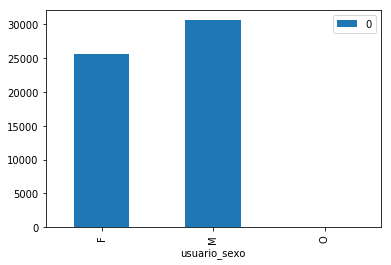

In [48]:
df_Bas_users_gender.plot.bar()

In [49]:
Bas_users_count=Bas_users.groupby(['fecha_alta']).count().reset_index()
df_Bas_users_count=pd.DataFrame(Bas_users_count)
df_Bas_users_count.head()

,fecha_alta,usuario_id,usuario_sexo,usuario_edad,hora_alta
0,01/01/2018,51,51,51,51
1,01/02/2018,243,243,243,243
2,01/03/2018,185,185,185,185
3,01/04/2018,59,59,59,59
4,01/05/2018,5,5,5,5


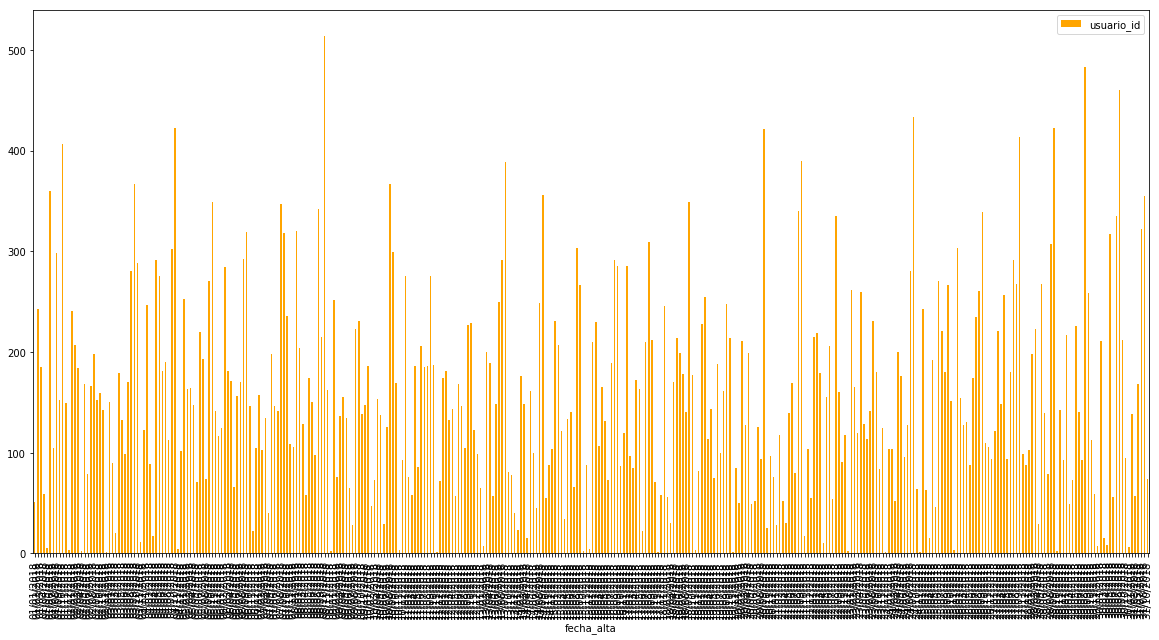

In [50]:
Plot3=Bas_users_count.plot(kind='bar',x='fecha_alta', y='usuario_id',color='orange',figsize=(20,10))


In [52]:
Plot3.figure.savefig('../Output/Argentina_trend_users.png')